<a href="https://colab.research.google.com/github/arechigajd/machinelearningprojectII/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

In [6]:
path = ('/content/healthcare-dataset-stroke-data.csv')
stroke_df = pd.read_csv(path)
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
stroke_df.drop(columns=['id', 'ever_married', 'work_type', 'Residence_type'], axis = 1, inplace = True)
stroke_df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,NaN,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1


Columns deleted were deleted for not adding any meaningful data related to predicting a patients possibility of getting a stroke.

Dataset dictionary:

gender: patients gender. male, female, or other
age: patients age
hypertension: more commonly known as high blood pressure. 0 doesn't have hypertension, 1 has hypertension.
heart_disease: presence of a heart disease. 0 doesn't have a heart disease, 1 has a heart disease.
avg_glucose_level: average glucose level in blood
bmi: body mass index
smoking_status: categorizes a patients smoking status. Includes formerly smoked, never smoked, smokes, or unknown.
stroke: whether a patient has had a stroke or not. 0 has never had a stroke, 1 has had a stroke.

Deleted columns:

Id, ever_married, work_type, Residence-type

In [8]:
stroke_df.duplicated().sum()

0

In [9]:
stroke_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Missing values found in bmi column. These will be imputed later using SimpleImputer.

Now it's time to look for inconsistencies and make them typical. First, a quick summary of the DataFrame.

In [10]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                4909 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 319.5+ KB


In [11]:
stroke_df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

There are some numbers on here that don't make much sense. Time to take a closer look using some filters.

In [13]:
age1fil = stroke_df['age'] == 0.08
stroke_df[age1fil].head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1614,Female,0.08,0,0,139.67,14.1,Unknown,0
3295,Male,0.08,0,0,70.33,16.9,Unknown,0


After a quick google search of bmi for ages of children, including 8 year old, the bmi matches what is about average for an 8 year old child, male or female. I will change the age to 8 years old.

In [14]:
stroke_df['age'] = stroke_df['age'].replace(0.08, 8)
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.64       4
1.40       3
0.48       3
0.16       3
0.40       2
Name: age, Length: 103, dtype: int64

In [15]:
a8yo = stroke_df['age'] == 8
stroke_df[a8yo].sample(8)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
2812,Female,8.0,0,0,87.92,14.1,Unknown,0
2803,Female,8.0,0,0,104.75,17.1,Unknown,0
3844,Female,8.0,0,0,76.12,19.4,Unknown,0
3731,Male,8.0,0,0,121.99,19.6,Unknown,0
1223,Male,8.0,0,0,115.54,28.5,Unknown,0
2854,Female,8.0,0,0,92.65,17.5,Unknown,0
3370,Female,8.0,0,0,67.84,24.0,Unknown,0
4788,Male,8.0,0,0,89.24,16.7,Unknown,0


In [16]:
age2fil = stroke_df['age'] == 0.40
stroke_df[age2fil].head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1600,Male,0.4,0,0,109.56,14.3,Unknown,0
4581,Female,0.4,0,0,85.65,17.4,Unknown,0


This look similar to a childs bmi, so I will change it to 4 years old.

In [17]:
stroke_df['age'] = stroke_df['age'].replace(0.40, 4)
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.80       4
0.64       4
1.40       3
0.48       3
0.16       3
Name: age, Length: 102, dtype: int64

In [18]:
a4yo = stroke_df['age'] == 4
stroke_df[a4yo].sample(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
999,Male,4.0,0,0,89.11,20.1,Unknown,0
3897,Male,4.0,0,0,90.42,16.2,Unknown,0
1359,Male,4.0,0,0,132.41,16.3,Unknown,0
4844,Female,4.0,0,0,72.49,16.9,Unknown,0
657,Female,4.0,0,0,107.25,12.0,Unknown,0


In [19]:
age3fil = stroke_df['age'] == 0.16
stroke_df[age3fil].head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
3618,Male,0.16,0,0,114.71,17.4,Unknown,0
3968,Male,0.16,0,0,69.79,13.0,Unknown,0
4021,Male,0.16,0,0,109.52,13.9,Unknown,0


This looks like 16 year olds as opposed to 1.6 year olds, so I will change these to 16.

In [20]:
stroke_df['age'] = stroke_df['age'].replace(0.16, 16)
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.16       4
0.80       4
0.64       4
1.40       3
0.48       3
Name: age, Length: 101, dtype: int64

In [21]:
a16yo = stroke_df['age'] == 16
stroke_df[a16yo].sample(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
3955,Female,16.0,0,0,86.53,42.2,never smoked,0
3719,Female,16.0,0,0,64.51,21.2,Unknown,0
3618,Male,16.0,0,0,114.71,17.4,Unknown,0
4569,Female,16.0,0,0,112.70,29.6,never smoked,0
3357,Male,16.0,0,0,106.11,22.4,Unknown,0


In [22]:
age4fil = stroke_df['age'] == 0.48
stroke_df[age4fil].head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
2030,Male,0.48,0,0,73.02,NaN,Unknown,0
4053,Female,0.48,0,0,118.75,17.4,Unknown,0
4645,Female,0.48,0,0,94.06,14.8,Unknown,0


I will continue forward using my intuition as to what these age number represent.

In [23]:
stroke_df['age'] = stroke_df['age'].replace(0.48, 48)
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.56       4
1.16       4
0.64       4
0.80       4
1.40       3
Name: age, Length: 100, dtype: int64

In [24]:
a48yo = stroke_df['age'] == 48
stroke_df[a48yo].sample(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
3617,Male,48.0,0,0,113.84,21.9,never smoked,0
2701,Male,48.0,0,0,78.24,32.9,never smoked,0
4374,Female,48.0,0,0,68.01,27.7,never smoked,0
2678,Female,48.0,0,0,77.99,31.2,formerly smoked,0
2335,Male,48.0,0,0,106.74,33.7,formerly smoked,0


In [25]:
age5fil = stroke_df['age'] == 1.40
stroke_df[age5fil].head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
850,Female,1.4,0,0,126.18,18.1,Unknown,0
995,Male,1.4,0,0,90.51,18.9,Unknown,0
1948,Female,1.4,0,0,129.07,20.6,Unknown,0


In [26]:
stroke_df['age'] = stroke_df['age'].replace(1.40, 14)
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.56       5
1.16       4
1.56       4
0.64       4
0.80       4
Name: age, Length: 99, dtype: int64

In [27]:
a14yo = stroke_df['age'] == 14
stroke_df[a14yo].sample(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
378,Female,14.0,0,0,72.36,20.5,Unknown,0
1708,Male,14.0,0,0,57.95,17.1,Unknown,0
2620,Female,14.0,0,0,92.22,22.8,Unknown,0
4662,Male,14.0,0,0,84.41,33.9,never smoked,0
3477,Male,14.0,0,0,74.54,25.2,Unknown,0


In [28]:
age6fil = stroke_df['age'] == 0.80
stroke_df[age6fil].head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1317,Male,0.8,0,0,98.67,17.5,Unknown,0
2630,Female,0.8,0,0,106.59,15.5,Unknown,0
2801,Male,0.8,0,0,75.22,33.1,Unknown,0
3626,Male,0.8,0,0,114.54,15.1,Unknown,0


In [29]:
stroke_df['age'] = stroke_df['age'].replace(0.80, 80)
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.88       5
0.56       5
1.56       4
1.16       4
0.64       4
Name: age, Length: 98, dtype: int64

In [30]:
a80yo = stroke_df['age'] == 80
stroke_df[a80yo].sample(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1915,Female,80.0,0,0,71.88,26.7,never smoked,0
2818,Male,80.0,0,1,82.41,26.3,smokes,0
1309,Male,80.0,0,1,181.23,32.2,formerly smoked,0
4336,Male,80.0,0,1,125.32,32.9,Unknown,0
5068,Male,80.0,0,0,120.03,24.3,formerly smoked,0


In [31]:
age7fil = stroke_df['age'] == 0.64
stroke_df[age7fil].head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,83.82,24.9,Unknown,0
1808,Female,0.64,0,0,62.27,17.3,Unknown,0
2012,Male,0.64,0,0,86.74,16.2,Unknown,0
2875,Male,0.64,0,0,60.40,17.3,Unknown,0


In [32]:
stroke_df['age'] = stroke_df['age'].replace(0.64, 64)
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.88       5
0.32       5
0.56       5
1.56       4
1.16       4
Name: age, Length: 97, dtype: int64

In [33]:
a64yo = stroke_df['age'] == 64
stroke_df[a64yo].sample(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
2327,Female,64.0,0,0,63.32,18.7,formerly smoked,0
2875,Male,64.0,0,0,60.40,17.3,Unknown,0
4260,Male,64.0,0,0,62.21,28.3,Unknown,0
5088,Female,64.0,1,0,76.89,30.2,Unknown,0
3863,Male,64.0,1,0,81.68,31.3,formerly smoked,0


In [34]:
age8fil = stroke_df['age'] == 1.16
stroke_df[age8fil].head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
753,Female,1.16,0,0,60.98,17.2,Unknown,0
2311,Female,1.16,0,0,65.01,17.0,Unknown,0
3092,Female,1.16,0,0,97.28,17.8,Unknown,0
4694,Female,1.16,0,0,86.00,13.3,Unknown,0


Age numbers with three numbers cannnot be estimated in a practical way. They will be deleted.

In [35]:
stroke_df.drop(labels = [753, 2311, 3092, 4694], axis = 0, inplace = True)
stroke_df[age8fil].head()
# help from shanelynn.ie

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke


In [36]:
age9fil = stroke_df['age'] == 1.56
stroke_df[age9fil].head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1134,Male,1.56,0,0,93.74,20.1,Unknown,0
1957,Female,1.56,0,0,113.40,19.5,Unknown,0
2708,Female,1.56,0,0,71.81,22.6,Unknown,0
3888,Male,1.56,0,0,109.12,18.9,Unknown,0


In [37]:
stroke_df.drop(labels = [1134, 1957, 2708, 3888], axis = 0, inplace = True)
stroke_df[age9fil].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke


In [38]:
age10fil = stroke_df['age'] == 0.56
stroke_df[age10fil].head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1975,Male,0.56,0,0,111.77,21.1,Unknown,0
2008,Male,0.56,0,0,57.02,20.7,Unknown,0
3251,Male,0.56,0,0,127.23,20.1,Unknown,0
3440,Male,0.56,0,0,98.23,14.1,Unknown,0
3894,Female,0.56,0,0,80.92,18.3,Unknown,0


In [39]:
stroke_df['age'] = stroke_df['age'].replace(0.56, 56)
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.24       5
1.00       5
0.72       5
0.32       5
0.88       5
Name: age, Length: 94, dtype: int64

In [40]:
a56yo = stroke_df['age'] == 56
stroke_df[a56yo].sample(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
2806,Female,56.0,0,0,82.12,32.5,smokes,0
3906,Male,56.0,0,0,122.39,30.3,Unknown,0
1333,Female,56.0,0,1,64.66,26.7,formerly smoked,0
166,Female,56.0,0,0,162.23,27.3,Unknown,1
2754,Female,56.0,0,0,112.16,25.7,Unknown,0


In [41]:
age11fil = stroke_df['age'] == 0.88
stroke_df[age11fil].head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
376,Female,0.88,0,0,88.11,15.5,Unknown,0
982,Male,0.88,0,0,157.57,19.2,Unknown,0
2358,Male,0.88,0,0,112.19,18.9,Unknown,0
2481,Male,0.88,0,0,90.62,22.4,Unknown,0
2490,Male,0.88,0,0,85.38,23.4,Unknown,0


In [42]:
stroke_df['age'] = stroke_df['age'].replace(0.88, 88)
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.24       5
1.00       5
0.72       5
0.32       5
88.00      5
Name: age, Length: 94, dtype: int64

Check to see dtype of age column.

In [43]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5102 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5102 non-null   object 
 1   age                5102 non-null   float64
 2   hypertension       5102 non-null   int64  
 3   heart_disease      5102 non-null   int64  
 4   avg_glucose_level  5102 non-null   float64
 5   bmi                4901 non-null   float64
 6   smoking_status     5102 non-null   object 
 7   stroke             5102 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 358.7+ KB


Will change age to int64 after going through and changing strange numbers.

In [44]:
a88yo = stroke_df['age'] == 88
stroke_df[a88yo].sample(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
2481,Male,88.0,0,0,90.62,22.4,Unknown,0
2490,Male,88.0,0,0,85.38,23.4,Unknown,0
376,Female,88.0,0,0,88.11,15.5,Unknown,0
982,Male,88.0,0,0,157.57,19.2,Unknown,0
2358,Male,88.0,0,0,112.19,18.9,Unknown,0


In [45]:
age12fil = stroke_df['age'] == 0.32
stroke_df[age12fil].head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
564,Female,0.32,0,0,73.71,16.2,Unknown,0
1093,Female,0.32,0,0,55.86,16.0,Unknown,0
2579,Male,0.32,0,0,127.78,20.8,Unknown,0
3859,Male,0.32,0,0,89.04,17.8,Unknown,0
4910,Female,0.32,0,0,108.63,19.6,Unknown,0


In [46]:
stroke_df['age'] = stroke_df['age'].replace(0.32, 32)
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.48       6
0.24       5
0.72       5
1.00       5
88.00      5
Name: age, Length: 93, dtype: int64

In [47]:
a32yo = stroke_df['age'] == 32
stroke_df[a32yo].sample(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1888,Female,32.0,0,0,199.18,27.9,never smoked,0
3250,Female,32.0,0,0,92.37,26.9,never smoked,0
2920,Male,32.0,0,0,72.10,23.2,never smoked,0
3095,Male,32.0,0,0,79.54,28.1,Unknown,0
2489,Male,32.0,0,0,92.08,28.4,smokes,0


In [48]:
age13fil = stroke_df['age'] == 1.00
stroke_df[age13fil].head(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
844,Male,1.0,0,0,89.30,21.4,Unknown,0
951,Male,1.0,0,0,123.21,15.1,Unknown,0
1432,Male,1.0,0,0,101.31,18.3,Unknown,0
1794,Male,1.0,0,0,84.85,20.3,Unknown,0
2240,Female,1.0,0,0,199.83,24.5,Unknown,0


In [49]:
stroke_df.drop(labels = [844, 951, 1432, 1794, 2240], axis = 0, inplace = True)
stroke_df[age13fil].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke


In [50]:
age14fil = stroke_df['age'] == 0.72
stroke_df[age14fil].head(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1206,Female,0.72,0,0,66.36,23.0,Unknown,0
4007,Male,0.72,0,0,159.79,19.9,Unknown,0
4409,Female,0.72,0,0,112.19,20.1,Unknown,0
4929,Male,0.72,0,0,80.08,16.4,Unknown,0
5089,Female,0.72,0,0,62.13,16.8,Unknown,0


In [51]:
stroke_df['age'] = stroke_df['age'].replace(0.72, 72)
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.08       8
1.72       6
1.48       6
0.24       5
88.00      5
Name: age, Length: 91, dtype: int64

In [52]:
a72yo = stroke_df['age'] == 72
stroke_df[a72yo].sample(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
3182,Female,72.0,1,0,90.87,22.1,never smoked,0
2138,Male,72.0,0,0,92.59,24.6,formerly smoked,0
2158,Female,72.0,0,0,226.88,36.7,formerly smoked,0
3756,Male,72.0,0,1,234.27,26.9,never smoked,0
1362,Female,72.0,0,0,103.25,26.9,formerly smoked,0


In [53]:
age15fil = stroke_df['age'] == 0.24
stroke_df[age15fil].head(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
996,Male,0.24,0,0,118.87,16.3,Unknown,0
1999,Male,0.24,0,0,146.97,18.5,Unknown,0
2898,Male,0.24,0,0,58.35,18.6,Unknown,0
3392,Male,0.24,0,0,89.28,14.2,Unknown,0
4293,Male,0.24,0,0,57.09,19.4,Unknown,0


In [54]:
stroke_df['age'] = stroke_df['age'].replace(0.24, 24)
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.88       8
1.24       8
1.72       6
1.48       6
88.00      5
Name: age, Length: 90, dtype: int64

In [55]:
a24yo = stroke_df['age'] == 24
stroke_df[a24yo].sample(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
4000,Female,24.0,0,0,105.26,26.1,never smoked,0
3574,Male,24.0,0,0,97.47,24.2,formerly smoked,0
3952,Female,24.0,0,0,71.63,22.0,formerly smoked,0
3793,Female,24.0,0,0,65.44,23.6,never smoked,0
4723,Female,24.0,0,0,114.54,30.1,smokes,0


In [56]:
age16fil = stroke_df['age'] == 1.48
stroke_df[age16fil].head(6)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1632,Female,1.48,0,0,55.51,18.5,Unknown,0
1927,Female,1.48,0,0,118.55,20.7,Unknown,0
3313,Female,1.48,0,0,55.59,17.9,Unknown,0
3435,Female,1.48,0,0,123.10,20.6,Unknown,0
3714,Female,1.48,0,0,61.53,20.5,Unknown,0
4303,Male,1.48,0,0,112.02,20.9,Unknown,0


In [57]:
stroke_df.drop(labels = [1632, 1927, 3313, 3435, 3714, 4303], axis = 0, inplace = True)
stroke_df[age16fil].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke


In [58]:
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.64       8
1.88       8
1.24       8
1.72       6
88.00      5
Name: age, Length: 89, dtype: int64

In [59]:
age17fil = stroke_df['age'] == 1.72
stroke_df[age17fil].head(6)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
913,Female,1.72,0,0,109.51,19.5,Unknown,0
1137,Male,1.72,0,0,75.79,17.6,Unknown,0
1758,Male,1.72,0,0,90.46,22.5,Unknown,0
2194,Male,1.72,0,0,127.29,18.5,Unknown,0
4364,Male,1.72,0,0,73.08,20.4,Unknown,0
5079,Male,1.72,0,0,77.28,17.1,Unknown,0


In [60]:
stroke_df.drop(labels = [913, 1137, 1758, 2194, 4364, 5079], axis = 0, inplace = True)
stroke_df[age17fil].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke


In [61]:
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.08       8
1.64       8
1.88       8
1.24       8
88.00      5
Name: age, Length: 88, dtype: int64

In [62]:
age18fil = stroke_df['age'] == 1.24
stroke_df[age18fil].head(8)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1244,Female,1.24,0,0,62.40,22.1,Unknown,0
1499,Female,1.24,0,0,113.96,21.5,Unknown,0
1609,Female,1.24,0,0,122.04,10.3,Unknown,0
2116,Male,1.24,0,0,109.97,19.3,Unknown,0
2692,Female,1.24,0,0,84.20,19.2,Unknown,0
2808,Female,1.24,0,0,77.33,19.2,Unknown,0
3584,Female,1.24,0,0,136.96,15.2,Unknown,0
5032,Female,1.24,0,0,61.94,20.3,Unknown,0


In [63]:
stroke_df.drop(labels = [1244, 1499, 1609, 2116, 2692, 2808, 3584, 5032], axis = 0, inplace = True)
stroke_df[age18fil].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke


In [64]:
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.64       8
1.88       8
1.08       8
1.32       8
88.00      5
Name: age, Length: 87, dtype: int64

In [65]:
age19fil = stroke_df['age'] == 1.32
stroke_df[age19fil].head(8)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,70.37,NaN,Unknown,1
2074,Male,1.32,0,0,78.53,19.8,Unknown,0
3097,Male,1.32,0,0,56.11,22.9,Unknown,0
3560,Female,1.32,0,0,110.17,20.3,Unknown,0
3647,Female,1.32,0,0,81.05,18.7,Unknown,0
4640,Female,1.32,0,0,67.68,16.5,Unknown,0
4831,Female,1.32,0,0,75.22,18.6,Unknown,0
4934,Male,1.32,0,0,107.02,NaN,Unknown,0


In [66]:
stroke_df.drop(labels = [162, 2074, 3097, 3560, 3647, 4640, 4831, 4934], axis = 0, inplace = True)
stroke_df[age19fil].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke


In [67]:
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.80       9
1.64       8
1.88       8
1.08       8
88.00      5
Name: age, Length: 86, dtype: int64

In [68]:
age20fil = stroke_df['age'] == 1.08
stroke_df[age20fil].head(8)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
597,Female,1.08,0,0,60.53,17.5,Unknown,0
1366,Male,1.08,0,0,86.09,19.5,Unknown,0
2305,Male,1.08,0,0,167.66,18.7,Unknown,0
3319,Female,1.08,0,0,159.39,12.8,Unknown,0
3705,Male,1.08,0,0,74.50,NaN,Unknown,0
4839,Male,1.08,0,0,83.27,24.3,Unknown,0
4860,Female,1.08,0,0,109.33,18.2,Unknown,0
5095,Male,1.08,0,0,79.15,17.4,Unknown,0


In [69]:
stroke_df.drop(labels = [597, 1366, 2305, 3319, 3705, 4839, 4860, 5095], axis = 0, inplace = True)
stroke_df[age20fil].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke


In [70]:
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
6.00      24
1.80       9
1.64       8
1.88       8
88.00      5
Name: age, Length: 85, dtype: int64

In [71]:
age21fil = stroke_df['age'] == 1.88
stroke_df[age21fil].head(8)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1218,Male,1.88,0,0,77.91,21.8,Unknown,0
1486,Male,1.88,0,0,111.65,16.3,Unknown,0
3321,Male,1.88,0,0,81.42,13.5,Unknown,0
3447,Female,1.88,0,0,97.26,16.7,Unknown,0
3605,Male,1.88,0,0,143.97,NaN,Unknown,0
3715,Female,1.88,0,0,100.74,18.6,Unknown,0
3868,Female,1.88,0,0,80.83,18.0,Unknown,0
4001,Male,1.88,0,0,68.35,19.1,Unknown,0


In [72]:
stroke_df.drop(labels = [1218, 1486, 3321, 3447, 3605, 3715, 3868, 4001], axis = 0, inplace = True)
stroke_df[age21fil].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke


In [73]:
stroke_df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
7.00      32
6.00      24
1.80       9
1.64       8
88.00      5
Name: age, Length: 84, dtype: int64

In [74]:
age22fil = stroke_df['age'] == 1.64
stroke_df[age22fil].head(8)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1101,Male,1.64,0,0,56.30,19.7,Unknown,0
2397,Male,1.64,0,0,115.12,21.1,Unknown,0
2472,Male,1.64,0,0,137.22,18.8,Unknown,0
2928,Male,1.64,0,0,170.88,20.8,Unknown,0
3610,Female,1.64,0,0,82.49,15.1,Unknown,0
3807,Male,1.64,0,0,56.21,19.0,Unknown,0
3883,Female,1.64,0,0,69.89,18.1,Unknown,0
4006,Female,1.64,0,0,90.74,19.9,Unknown,0


In [75]:
stroke_df.drop(labels = [1101, 2397, 2472, 2928, 3610, 3807, 3883, 4006], axis = 0, inplace = True)
stroke_df[age22fil].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke


In [76]:
stroke_df['age'].value_counts()

78.0    102
57.0     95
52.0     90
54.0     87
51.0     86
       ... 
10.0     35
7.0      32
6.0      24
1.8       9
88.0      5
Name: age, Length: 83, dtype: int64

In [77]:
age23fil = stroke_df['age'] == 1.8
stroke_df[age23fil].head(9)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
562,Female,1.8,0,0,58.26,16.5,Unknown,0
607,Female,1.8,0,0,102.34,17.0,Unknown,0
684,Female,1.8,0,0,130.61,14.4,Unknown,0
2329,Female,1.8,0,0,162.93,15.7,Unknown,0
3726,Male,1.8,0,0,68.80,NaN,Unknown,0
3786,Female,1.8,0,0,95.28,16.5,Unknown,0
3928,Male,1.8,0,0,85.16,20.2,Unknown,0
4546,Female,1.8,0,0,96.62,18.6,Unknown,0
4842,Male,1.8,0,0,153.31,17.1,Unknown,0


In [78]:
stroke_df['age'] = stroke_df['age'].replace(1.8, 18)
stroke_df['age'].value_counts()

78.0    102
57.0     95
52.0     90
54.0     87
51.0     86
       ... 
4.0      36
10.0     35
7.0      32
6.0      24
88.0      5
Name: age, Length: 82, dtype: int64

In [79]:
a18yo = stroke_df['age'] == 18
stroke_df[a18yo].sample(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
4976,Female,18.0,0,0,101.95,46.0,formerly smoked,0
2644,Female,18.0,0,0,101.09,19.3,smokes,0
1470,Male,18.0,0,0,83.02,40.4,Unknown,0
1095,Male,18.0,0,0,103.94,23.3,never smoked,0
5103,Female,18.0,0,0,82.85,46.9,Unknown,0


In [80]:
stroke_df['age'] = stroke_df['age'].astype('int')

In [81]:
stroke_df['gender'].value_counts()

Female    2960
Male      2084
Other        1
Name: gender, dtype: int64

In [82]:
stroke_df['age'].value_counts()

78    102
57     95
52     90
54     87
51     86
     ... 
4      36
10     35
7      32
6      24
88      5
Name: age, Length: 82, dtype: int64

In [83]:
stroke_df['hypertension'].value_counts()

0    4547
1     498
Name: hypertension, dtype: int64

In [84]:
stroke_df['heart_disease'].value_counts()

0    4769
1     276
Name: heart_disease, dtype: int64

In [85]:
stroke_df['avg_glucose_level'].value_counts()

93.88     6
91.85     5
84.10     5
91.68     5
72.49     5
         ..
176.48    1
94.07     1
111.93    1
94.40     1
85.28     1
Name: avg_glucose_level, Length: 3944, dtype: int64

In [86]:
stroke_df['bmi'].value_counts()

28.7    41
28.4    38
26.1    37
26.7    37
27.7    37
        ..
51.8     1
13.4     1
56.0     1
57.3     1
14.9     1
Name: bmi, Length: 414, dtype: int64

In [87]:
stroke_df['smoking_status'].value_counts()

never smoked       1892
Unknown            1479
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [88]:
stroke_df['stroke'].value_counts()

0    4797
1     248
Name: stroke, dtype: int64

Having finished reviewing data to make sure the data made sense and is typical, it's time to move forward to some visuals about the features and the target.

In [89]:
# Import matplotlib.pyplot to produce visual graphs of the data
import matplotlib.pyplot as plt

First, the target.

In [90]:
stroke_counts = stroke_df['stroke'].value_counts()
stroke_counts

0    4797
1     248
Name: stroke, dtype: int64

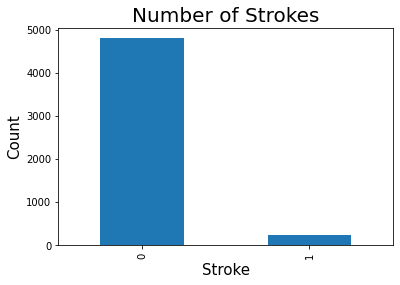

In [91]:
stroke_counts.plot(kind = 'bar')
plt.title('Number of Strokes', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Stroke', fontsize = 15)
# Remainder, 1 are patients who have had a stroke, 0 are patients who have not
plt.show()

Now, for the features.

In [92]:
gender_counts = stroke_df['gender'].value_counts()
gender_counts

Female    2960
Male      2084
Other        1
Name: gender, dtype: int64

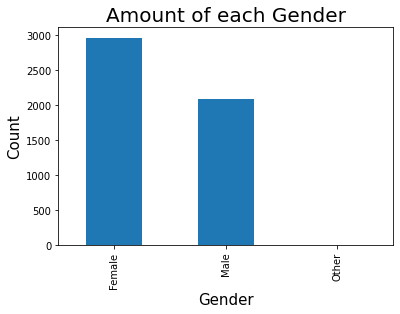

In [93]:
gender_counts.plot(kind = 'bar')
plt.title('Amount of each Gender', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Gender', fontsize = 15)
plt.show()

In [94]:
age_counts = stroke_df['age'].value_counts()
age_counts

78    102
57     95
52     90
54     87
51     86
     ... 
4      36
10     35
7      32
6      24
88      5
Name: age, Length: 82, dtype: int64

In [95]:
import seaborn as sns

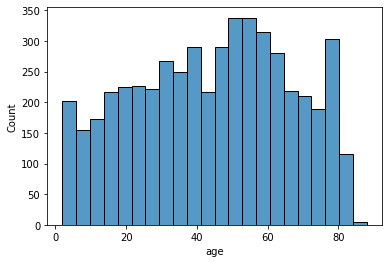

In [96]:
sns.histplot(data = stroke_df, x = 'age');

In [97]:
hypertension_counts = stroke_df['hypertension'].value_counts()
hypertension_counts

0    4547
1     498
Name: hypertension, dtype: int64

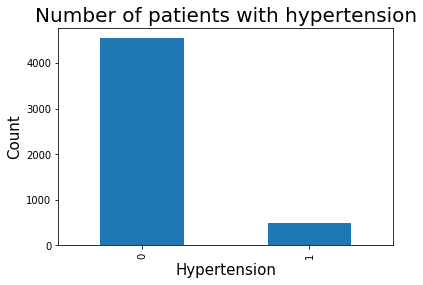

In [98]:
hypertension_counts.plot(kind = 'bar')
plt.title('Number of patients with hypertension', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Hypertension', fontsize = 15)
# 0 = No, 1 = Yes
plt.show()

In [99]:
hd_counts = stroke_df['heart_disease'].value_counts()
hd_counts

0    4769
1     276
Name: heart_disease, dtype: int64

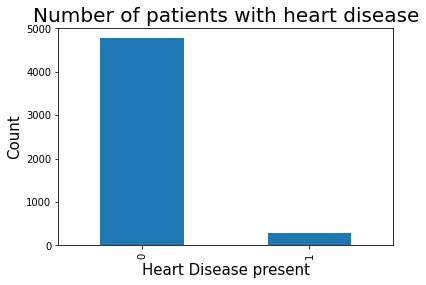

In [100]:
hd_counts.plot(kind = 'bar')
plt.title('Number of patients with heart disease', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Heart Disease present', fontsize = 15)
# 0 = No, 1 = Yes
plt.show()

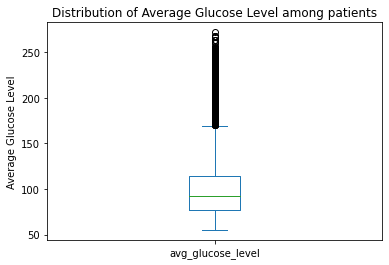

In [101]:
stroke_df['avg_glucose_level'].plot(kind='box')
plt.title('Distribution of Average Glucose Level among patients')
plt.ylabel('Average Glucose Level')
plt.show()

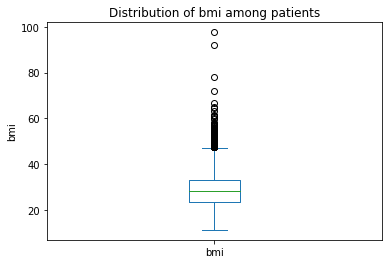

In [102]:
stroke_df['bmi'].plot(kind='box')
plt.title('Distribution of bmi among patients')
plt.ylabel('bmi')
plt.show()

In [103]:
ss_counts = stroke_df['smoking_status'].value_counts()
ss_counts

never smoked       1892
Unknown            1479
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

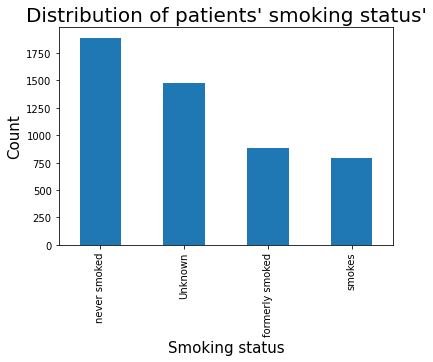

In [104]:
ss_counts.plot(kind = 'bar')
plt.title('Distribution of patients\' smoking status\'', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Smoking status', fontsize = 15)
plt.show()

In [105]:
stroke_df['avg_glucose_level'].describe()

count    5045.000000
mean      106.295982
std        45.422944
min        55.120000
25%        77.300000
50%        91.930000
75%       114.180000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [106]:
stroke_df['bmi'].describe()

count    4848.000000
mean       29.019678
std         7.815935
min        11.300000
25%        23.700000
50%        28.200000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

The columns for average glucose level and bmi show outliers in the larger numbers.

Now, I will look for correlations between features and the target, and between feature. I will also use a heatmap to do this.

In [107]:
stcorr = stroke_df.corr()
stcorr.head(6)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.271446,0.262397,0.236660,0.290279,0.246013
hypertension,0.271446,1.000000,0.107409,0.174097,0.164614,0.127622
heart_disease,0.262397,0.107409,1.000000,0.161671,0.038117,0.134788
avg_glucose_level,0.236660,0.174097,0.161671,1.000000,0.174106,0.132662
bmi,0.290279,0.164614,0.038117,0.174106,1.000000,0.039425
stroke,0.246013,0.127622,0.134788,0.132662,0.039425,1.000000


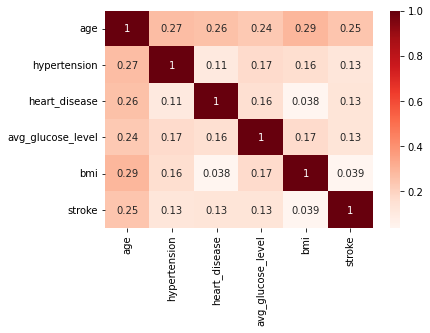

In [108]:
sns.heatmap(stcorr, cmap = 'Reds', annot = True);

Generally, anything below 0.3 would be considered too low to have any correlation with any other attribute. However, I'm going to consider that the dataset is also more heavily skewed in one direction than the other, with many more patients not having a stroke than having a stroke. So, I will take a look at the how the features and target correlate with the given data.

Strokes, the target variable, are most correlated with age, followed by hypertension, heart disease, and average glucose level. So, being older increases a person's chance of having a stroke more so than any of the other features available in the data. There is no correlation between bmi and strokes. Also, there are no negative correlations to consider, they are all positive.

Among features, age seems to have some correlation with all the other features. It likely highlights how age is a big factor when considering the health of individuals in general. Interestingly, age has higher correlation with three other features(hypertension, heart disease, and bmi) than it does with strokes, and of those the highest correlation is with bmi. Could this mean that if those three other features are high, regardless of age, it may lead to higher chances of having a stroke? This is only speculation on my part.

I'll take a look at some other visuals with some these features and the target.

In [109]:
strokesy = stroke_df[stroke_df['stroke'] == 1]
len(strokesy)

248

I want to know more about those who have had strokes, so I have made a seperate set of data for only those who have had a stroke.

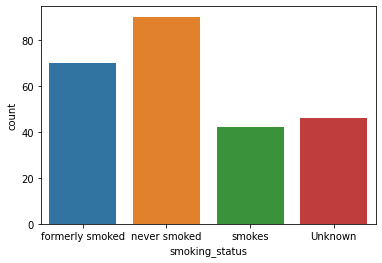

In [110]:
sns.countplot(data = strokesy, x = 'smoking_status', orient = 'h');

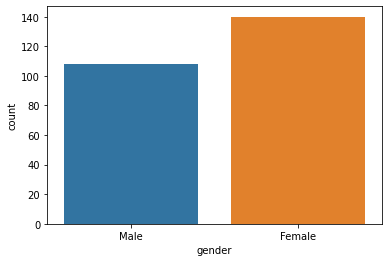

In [111]:
sns.countplot(data = strokesy, x = 'gender', orient = 'h');

With these two graphs, some interesting findings present themselves. First, according to our data, those who have never smoked had the highest count of having had a stroke, followed by formerly smoked, unknown, and smokes, in that order. Yes, those patients who still smoke registered the lowest amount of total number of strokes among the smoking_status feature. This information becomes useful when talking with patients about the prospect of a stroke in their futures'. For example, advising those who don't smoke about preventative measures with more frequency than smokers could lead to less strokes from non-smoker patients. Secondly, the data shows that females account for a larger amount of strokes than males. Again, this information becomes useful when advising patients about stroke preventive measures they can take, and focusing more frequently on females may lead to less strokes.

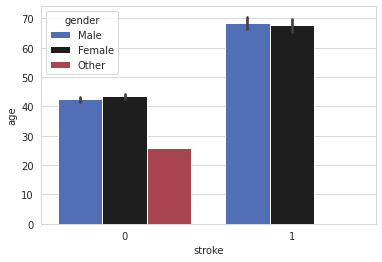

In [131]:
sns.barplot(data = stroke_df, x ='stroke', y ='age', hue = 'gender', palette ='icefire')
plt.show()

This bar graph shows a couple things. One, we see age still seems like the most defining feature as to whether someone is more likely at risk for a stroke or not, the older a person is the likelyhood of a stroke increases. Secondly, it seems as though males have a bigger window is which their chances of having a stroke may be. Excluding others since their data only shows them in te group without having a stroke, we can see that in the group that has not had a stroke the male age group shows them to be younger than females while for those who have had a stroke the males show to be older than the females. This means males should begin to consider and even implement preventative measures sooner and for a larger portion of their lifetime than females.

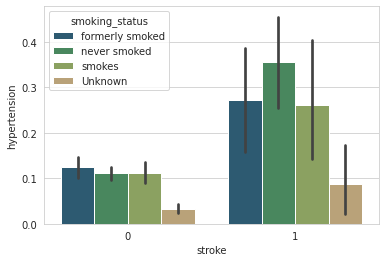

In [133]:
sns.barplot(data = stroke_df, x ='stroke', y ='hypertension', hue = 'smoking_status', palette ='gist_earth')
plt.show()

This bargraph shows us how a patients stroke probability coincides with a patients hypertension diagnosis and their smoking status. First we see that among those who have not had a stroke, their hypertension was never higher than 0.15. It does however show that those who formerly smoked had higher hypertension than the others. Among those who have had a stroke, the majority of their hypertension status' were 0.25 and above, with the outlier being those patients who are unknown to have a smoking habits(or lack thereof). So, we can see that higher hypertension leads to a higher chance of having a stroke. Insofar as smoking status, according to the data those who have never smoked had higher hypertension status'. If we look back at how a higher hypertension status can lead to higher chances of a stroke, we can deduce that those who have never smoked have a higher probability to having a stroke than their counterparts.